# Chap 12 - Ex4: cluster customers into group using Wholesale_customers.csv

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress = True)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

In [2]:
wholesale = pd.read_csv('Data/Wholesale_customers.csv')
wholesale

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
wholesale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
wholesale.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Number of numeric fields: 6

All numeric fields: ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']



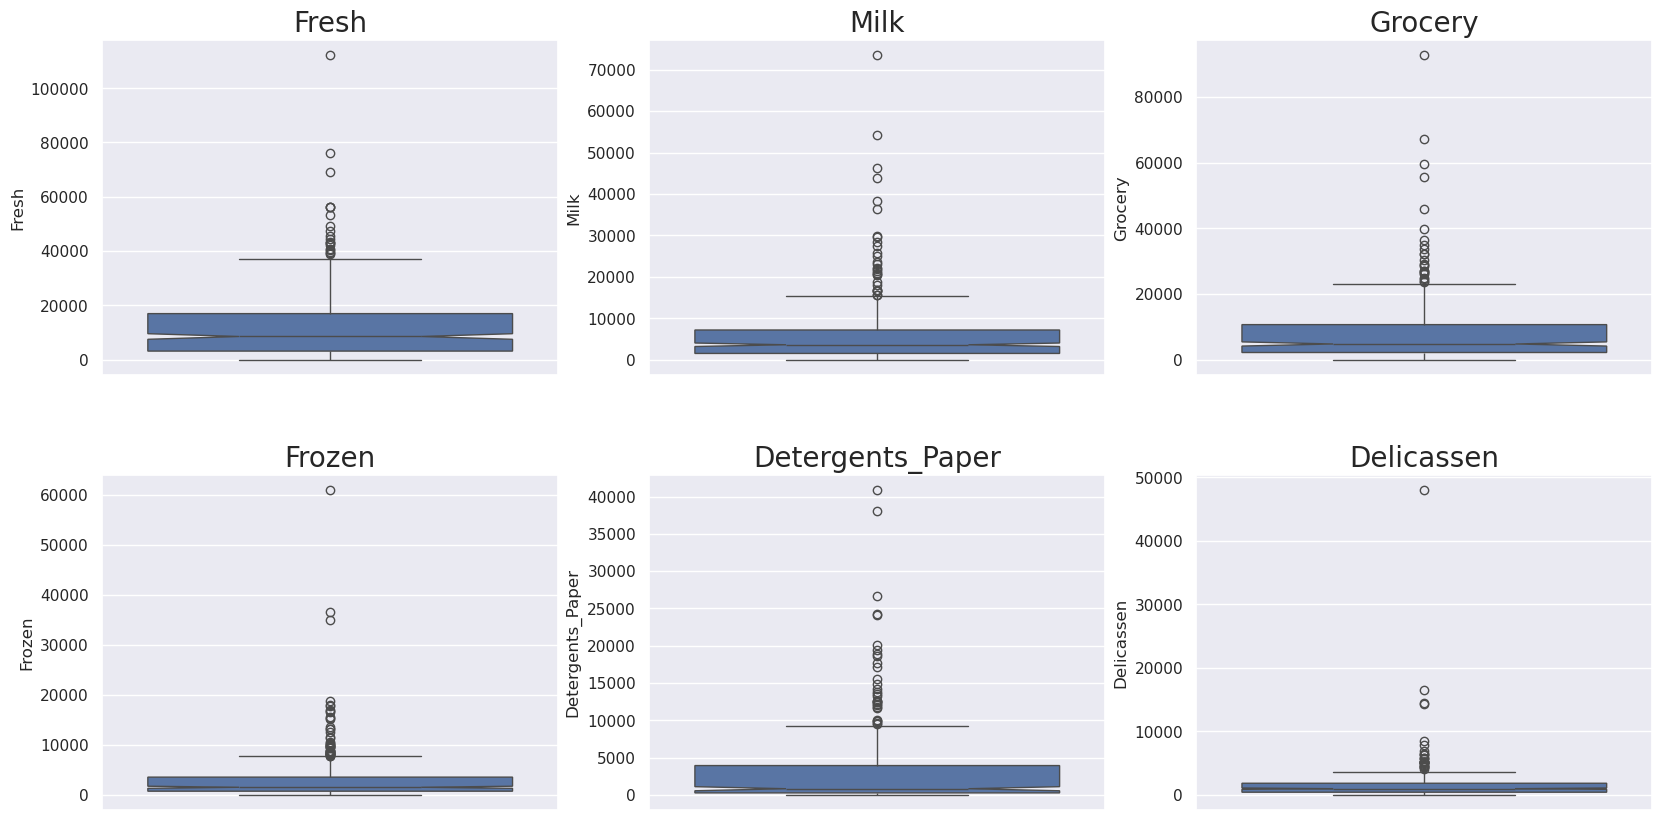


-----------------------------------------------------------------------------------------------------------------------------

Number of categorical fields: 2

All categorical fields: ['Channel', 'Region']



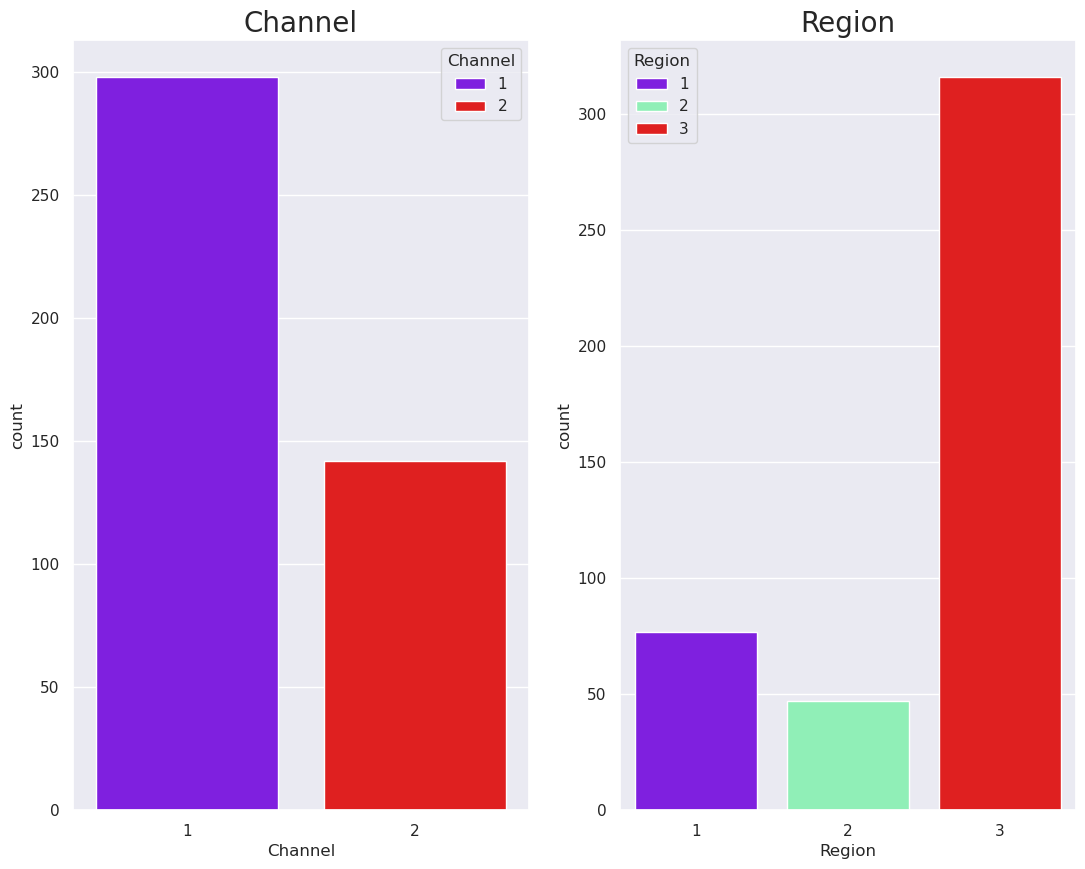

In [5]:
numeric_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
categ_cols = ['Channel', 'Region']

##### Function building ##############

def boxplot_numeric(df, numeric_cols, figsize=(20, 10), groups = None):
    col = 3
    if (len(numeric_cols) % 3) == 0:
        row = len(numeric_cols) // 3
    else:
        row = (len(numeric_cols) // 3) + 1
    '''
    numeric_cols: list các tên cột biến định lượng
    row: số lượng dòng trong lưới đồ thị
    col: số lượng cột trong lưới đồ thị
    figsize: kích thước biểu đồ
    groups: tên cột chứa biến phân nhóm như 'Group' hoặc 'Class' hoặc 'Label'
    '''
    print(f'Number of numeric fields: {len(numeric_cols)}')
    print()
    print(f'All numeric fields: {numeric_cols}')
    print()
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)
    for i in range(1, len(numeric_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        sbn.boxplot(data = df, x = groups, y = numeric_cols[i-1], notch = True, hue = groups)
        plt.title(numeric_cols[i-1], size = 20)
      except:
        print('Error {}'.format(numeric_cols[i-1]))
        break
    plt.show()


def countplot_categ(df, categ_cols, figsize=(20, 10), groups = None):
    col = 3
    if (len(categ_cols) % 3) == 0:
        row = len(categ_cols) // 3
    else:
        row = (len(categ_cols) // 3) + 1
    '''
    categ_cols: list các tên cột biến định tính
    row: số lượng dòng trong lưới đồ thị
    col: số lượng cột trong lưới đồ thị
    figsize: kích thước biểu đồ
    groups: tên cột chứa biến phân nhóm như 'Group' hoặc 'Class' hoặc 'Label'
    '''
    print(f'Number of categorical fields: {len(categ_cols)}')
    print()
    print(f'All categorical fields: {categ_cols}')
    print()
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)
    for i in range(1, len(categ_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        sbn.countplot(data = df, x = df[categ_cols[i-1]], hue = df[categ_cols[i-1]], palette = 'rainbow')
        plt.title(categ_cols[i-1], size = 20)
      except:
        print('Error {}'.format(categ_cols[i-1]))
        break
    plt.show()

## Draw
sbn.set_theme(style ='darkgrid')
boxplot_numeric(wholesale, numeric_cols)
print('\n-----------------------------------------------------------------------------------------------------------------------------\n')
countplot_categ(wholesale, categ_cols)

## Use Natural Logarith scaling combined with MinMaxScaler method since the data are very right-skewed

## <span style = 'color:yellow'> Find optimal K using Silhoutte Score

In [14]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

k_nums = range(2, 16)

numeric_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
categ_cols = ['Channel', 'Region']

LogScaler = ColumnTransformer(
    transformers=[('log_transform', FunctionTransformer(func=np.log, inverse_func=np.exp, validate=True), numeric_cols)],
    remainder='passthrough'
)

data = wholesale.copy()

for k in k_nums:
    hierclust_pipe = Pipeline([
        ('LogScaler', LogScaler),
        ('MinMaxScaler', MinMaxScaler()),
        ('HierachichalClustering', AgglomerativeClustering(n_clusters = k))
    ])
    hierclust_pipe.fit(data)
    
    data_scaled = (
        pd.DataFrame(hierclust_pipe[:-1].transform(data)) #Transform original data with LogScaler and MinMaxScaler
        .pipe(lambda df: df.set_axis(data.columns, axis =1))
            )
    
    labels = hierclust_pipe.named_steps['HierachichalClustering'].labels_
    print(f'Silhouette score for k = {k}: {silhouette_score(data_scaled, labels)}')

print('\nChoose K = 2 clusters')

Silhouette score for k = 2: 0.5066239466063854
Silhouette score for k = 3: 0.5137104973067264
Silhouette score for k = 4: 0.5123896518953645
Silhouette score for k = 5: 0.4054128177550481
Silhouette score for k = 6: 0.3321391067470742
Silhouette score for k = 7: 0.333567387057133
Silhouette score for k = 8: 0.27855622308669803
Silhouette score for k = 9: 0.2842259981130559
Silhouette score for k = 10: 0.287187783175961
Silhouette score for k = 11: 0.2900213825444668
Silhouette score for k = 12: 0.26563980749934635
Silhouette score for k = 13: 0.2690620400110613
Silhouette score for k = 14: 0.26368728961839116
Silhouette score for k = 15: 0.2348264784915233

Choose K = 2 clusters


## <span style = 'color:yellow'> Build official model with k = 2

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_clustered_heatmap(data, model, title="Clustered Heatmap"):
    """
    Plots a clustered heatmap from AgglomerativeClustering outputs.

    Args:
        data: The original data (DataFrame or NumPy array).
        model: Fitted AgglomerativeClustering model.
        title: Title of the plot.
    """

    # Create linkage matrix
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Reorder the data based on clustering
    if isinstance(data, pd.DataFrame):
        ordered_indices = model.labels_
        ordered_data = data.iloc[np.argsort(ordered_indices)]
    else:
        ordered_indices = model.labels_
        ordered_data = data[np.argsort(ordered_indices)]

    # Plot the clustered heatmap
    fig = sbn.clustermap(ordered_data, row_linkage=linkage_matrix, col_cluster=False, figsize=(10, 10), cmap="viridis", cbar_pos=(0.02, 0.8, 0.03, 0.15))
    fig.ax_heatmap.set_title(title)
    plt.show()

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

def plot_dendrogram(model, **kwargs):
    """
    Plots a dendrogram from an AgglomerativeClustering model.

    Args:
        model: AgglomerativeClustering model.
        **kwargs: Keyword arguments to pass to scipy.cluster.hierarchy.dendrogram.
    """
    # Create linkage matrix from the model's children.
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram.
    dendrogram(linkage_matrix, **kwargs)
    plt.show()

     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen  Group
0          2       3  12669   9656     7561     214              2674        1338      1
1          2       3   7057   9810     9568    1762              3293        1776      1
2          2       3   6353   8808     7684    2405              3516        7844      1
3          1       3  13265   1196     4221    6404               507        1788      0
4          2       3  22615   5410     7198    3915              1777        5185      1
..       ...     ...    ...    ...      ...     ...               ...         ...    ...
435        1       3  29703  12051    16027   13135               182        2204      0
436        1       3  39228   1431      764    4510                93        2346      0
437        2       3  14531  15488    30243     437             14841        1867      1
438        1       3  10290   1981     2232    1038               168        2125      0
439        1       3 

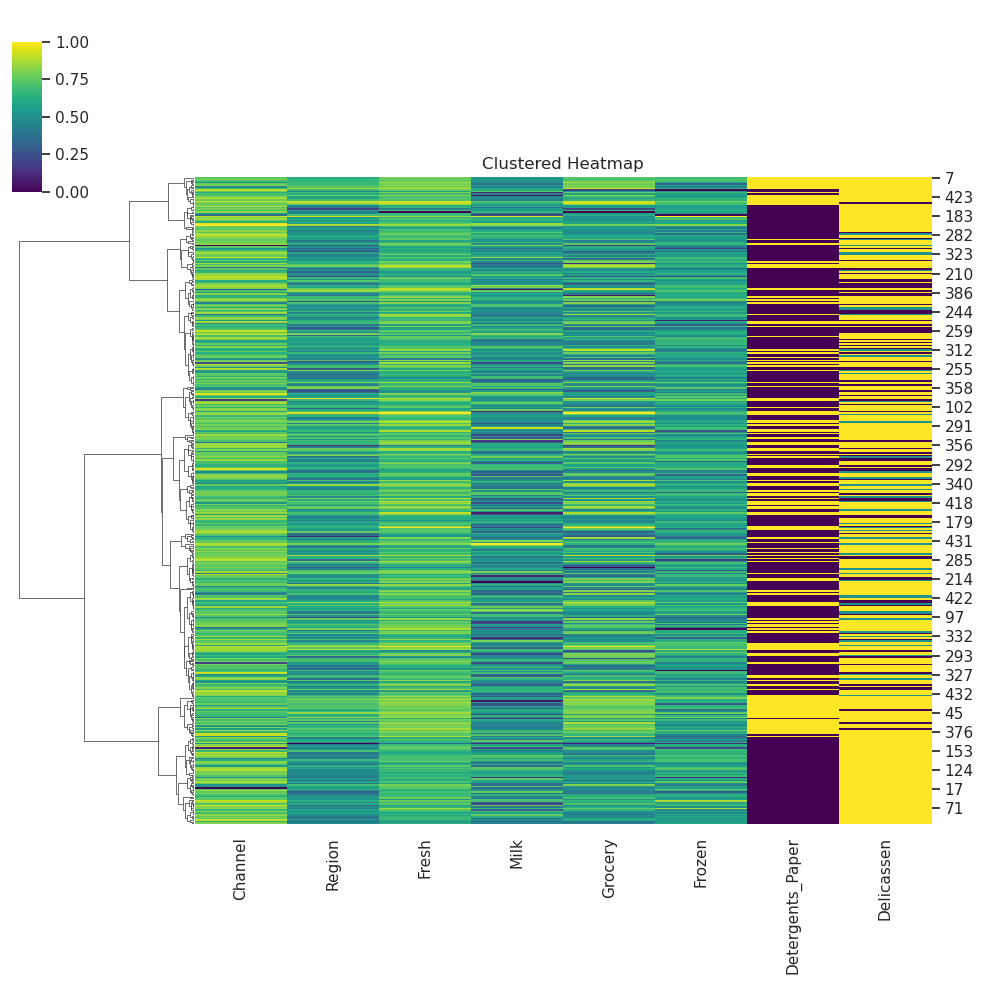

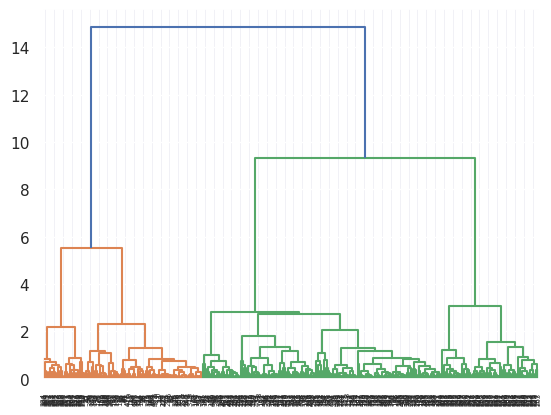

In [16]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
categ_cols = ['Channel', 'Region']

LogScaler = ColumnTransformer(
    transformers=[('log_transform', FunctionTransformer(func=np.log, inverse_func=np.exp, validate=True), numeric_cols)],
    remainder='passthrough'
)

data = wholesale.copy()

hierclust_pipe = Pipeline([
    ('LogScaler', LogScaler),
    ('MinMaxScaler', MinMaxScaler()),
    ('HierachichalClustering', AgglomerativeClustering(n_clusters = 2, compute_distances=True))
])
hierclust_pipe.fit(data)

data_scaled_plot = (
    pd.DataFrame(hierclust_pipe[:-1].transform(data)) #Transform original data with LogScaler and MinMaxScaler
    .pipe(lambda df: df.set_axis(data.columns, axis =1))
        )
    
labels = hierclust_pipe.named_steps['HierachichalClustering'].labels_

data['Group'] = labels
print(data)
print()

print('-----------------------------------------------------------------------')
print('Data scaled for plot:\n', data_scaled_plot)
plot_clustered_heatmap(data_scaled_plot, hierclust_pipe.named_steps['HierachichalClustering'])
plot_dendrogram(hierclust_pipe.named_steps['HierachichalClustering'])

# <span style = 'color:yellow'> Report clustering results:

In [89]:
data_group = data.copy()

for group in data_group['Group'].unique():
    print(f'\n=============== Cluster group {group} =========================\n')
    data = data_group[data_group['Group'] == group]
    print(f'n_observations: {data.shape[0]}\n')
    for col_name in data.columns[:-1]:
        if col_name in ['Region', 'Channel']:
            print(f'{data[col_name].value_counts().to_frame().reset_index()}')
            print()
        else:
            print(f'{col_name}: {np.min(data[col_name])} ~ {np.median(data[col_name])} ~ {np.max(data[col_name])}')
            print()


=============== Cluster group 1 =========================

n_observations: 142

   Channel  count
0        2    142

   Region  count
0       3    105
1       2     19
2       1     18

Fresh: 18 ~ 5993.5 ~ 44466

Milk: 928 ~ 7812.0 ~ 73498

Grocery: 2743 ~ 12390.0 ~ 92780

Frozen: 33 ~ 1081.0 ~ 11559

Detergents_Paper: 332 ~ 5614.5 ~ 40827

Delicassen: 3 ~ 1350.0 ~ 16523


=============== Cluster group 0 =========================

n_observations: 298

   Channel  count
0        1    298

   Region  count
0       3    211
1       1     59
2       2     28

Fresh: 3 ~ 9581.5 ~ 112151

Milk: 55 ~ 2157.0 ~ 43950

Grocery: 3 ~ 2684.0 ~ 21042

Frozen: 25 ~ 2057.5 ~ 60869

Detergents_Paper: 3 ~ 385.5 ~ 6907

Delicassen: 3 ~ 821.0 ~ 47943



Number of numeric fields: 6

All numeric fields: ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']



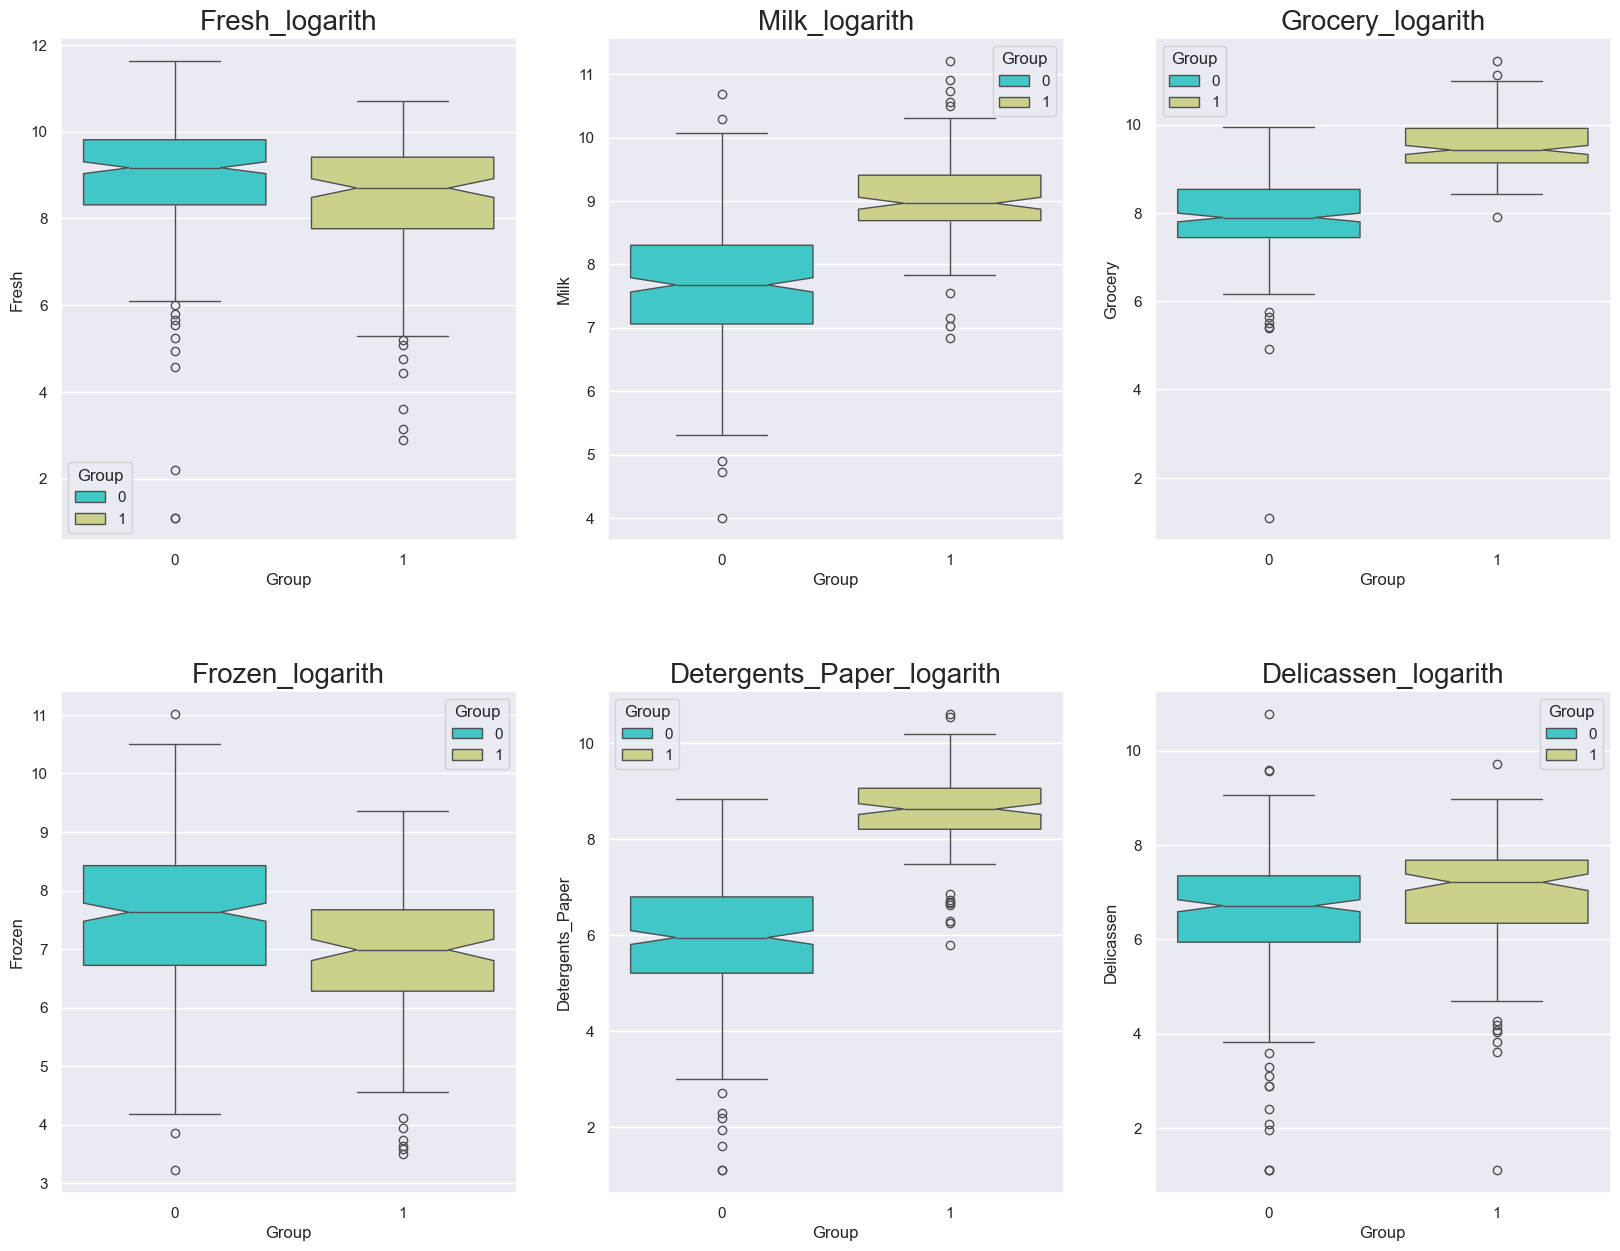


-----------------------------------------------------------------------------------------------------------------------------

Number of categorical fields: 2

All categorical fields: ['Channel', 'Region']



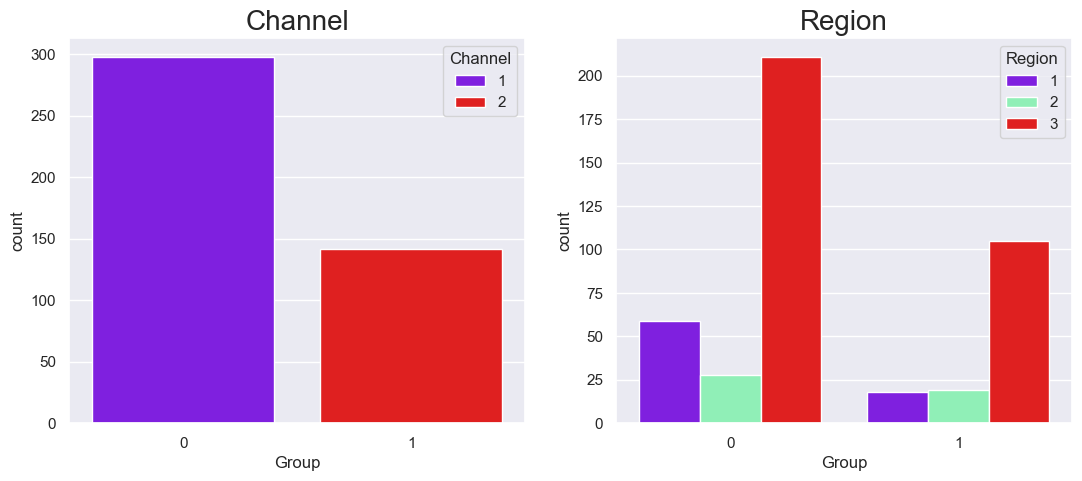

In [94]:
numeric_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
categ_cols = ['Channel', 'Region']

##### Function building ##############

def boxplot_numeric(df, numeric_cols, figsize=(20, 15), groups = None):
    col = 3
    if (len(numeric_cols) % 3) == 0:
        row = len(numeric_cols) // 3
    else:
        row = (len(numeric_cols) // 3) + 1
    '''
    numeric_cols: list các tên cột biến định lượng
    row: số lượng dòng trong lưới đồ thị
    col: số lượng cột trong lưới đồ thị
    figsize: kích thước biểu đồ
    groups: tên cột chứa biến phân nhóm như 'Group' hoặc 'Class' hoặc 'Label'
    '''
    print(f'Number of numeric fields: {len(numeric_cols)}')
    print()
    print(f'All numeric fields: {numeric_cols}')
    print()
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)
    for i in range(1, len(numeric_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        sbn.boxplot(data = df, x = groups, y = np.log(df[numeric_cols[i-1]]), notch = True, hue = groups, palette = 'rainbow')
        plt.title(numeric_cols[i-1]+'_logarith', size = 20)
      except:
        print('Error {}'.format(numeric_cols[i-1]))
        break
    plt.show()


def countplot_categ(df, categ_cols, figsize=(20, 5), groups = None):
    col = 3
    if (len(categ_cols) % 3) == 0:
        row = len(categ_cols) // 3
    else:
        row = (len(categ_cols) // 3) + 1
    '''
    categ_cols: list các tên cột biến định tính
    row: số lượng dòng trong lưới đồ thị
    col: số lượng cột trong lưới đồ thị
    figsize: kích thước biểu đồ
    groups: tên cột chứa biến phân nhóm như 'Group' hoặc 'Class' hoặc 'Label'
    '''
    print(f'Number of categorical fields: {len(categ_cols)}')
    print()
    print(f'All categorical fields: {categ_cols}')
    print()
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)
    for i in range(1, len(categ_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        sbn.countplot(data = df, x = groups, hue = categ_cols[i-1], palette = 'rainbow')
        plt.title(categ_cols[i-1], size = 20)
      except:
        print('Error {}'.format(categ_cols[i-1]))
        break
    plt.show()

## Draw
sbn.set_theme(style ='darkgrid')
boxplot_numeric(data_group, numeric_cols, groups = data_group.iloc[:,-1])
print('\n-----------------------------------------------------------------------------------------------------------------------------\n')
countplot_categ(data_group, categ_cols, groups = data_group.iloc[:,-1])